## Practical task 1 - *Introduction*

Kolos Maria BSE141

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('adult.data.csv')

In [3]:
data.head()

age         workclass  fnlwgt   education  education-num  \
0   32           Private  205019  Assoc-acdm             12   
1   40           Private  121772   Assoc-voc             11   
2   34           Private  245487     7th-8th              4   
3   25  Self-emp-not-inc  176756     HS-grad              9   
4   32           Private  186824     HS-grad              9   

       marital-status         occupation   relationship                race  \
0       Never-married              Sales  Not-in-family               Black   
1  Married-civ-spouse       Craft-repair        Husband  Asian-Pac-Islander   
2  Married-civ-spouse   Transport-moving        Husband  Amer-Indian-Eskimo   
3       Never-married    Farming-fishing      Own-child               White   
4       Never-married  Machine-op-inspct      Unmarried               White   

    sex  capital-gain  capital-loss  hours-per-week native-country salary  
0  Male             0             0              50  United-States  <=50K  
1  Male             0             0              40              ?   >50K  
2  Male             0             0              45         Mexico  <=50K  
3  Male             0             0              35  United-States  <=50K  
4  Male             0             0              40  United-States  <=50K

### 1. How many males and females are there?

In [4]:
len(data[data.sex=='Male']),len(data[data.sex=='Female'])

(21782, 10766)

### 2. What is the mean male age?

In [5]:
np.mean(data[data.sex=='Male']['age'])

39.432375355798364

### 3. What is the proportion of the US citizens?

In [6]:
len(data[data['native-country']=='United-States'])/len(data)

0.8959075826471673

### 4. Plot the distribution of people’s education as a bar plot.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.plotly as py

In [8]:
output = np.bincount(data['education-num'])

range(0, 17)


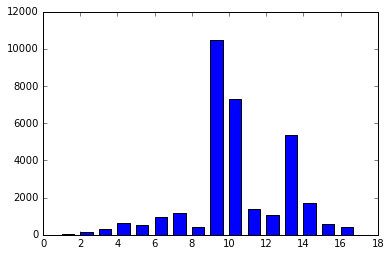

In [9]:
r=range(17)
width = 1/1.5
print(r)
plt.bar(r,output,width)


plt.show()

### 5. What is the mean and standard deviation of the "final weight"(fnlwgt) for divorced people?

In [10]:
np.mean(data[data['marital-status']=='Divorced'].fnlwgt),np.std(data[data['marital-status']=='Divorced'].fnlwgt)

(185796.0720396218, 105645.8403288721)

### 6. Is it true that the people who receive over 50k are mostly highly educated?

In [11]:
sum(data[data.salary=='>50K']['education'].isin(['Bachelors','Masters','Doctorate']))/len(data[data.salary=='>50K'])>0.5

False

### 7. What is the maximum male and female age for each race?

In [12]:
grouped=data.groupby('race')
for name, group in grouped:
    print(name)
    print(np.max(group[group.sex=='Male']['age']),np.max(group[group.sex=='Female']['age']))

Amer-Indian-Eskimo
82 80
Asian-Pac-Islander
90 75
Black
90 90
Other
77 74
White
90 90


### 8. The people from which countries work as farmers/fishers?

In [13]:
np.unique(data[data.occupation=='Farming-fishing']['native-country'])

array(['?', 'Cambodia', 'Canada', 'Cuba', 'El-Salvador', 'England',
       'France', 'Germany', 'Guatemala', 'Hong', 'Ireland', 'Italy',
       'Japan', 'Mexico', 'Philippines', 'Poland', 'Portugal',
       'Puerto-Rico', 'United-States', 'Vietnam', 'Yugoslavia'], dtype=object)

### 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [14]:
print('Male' if len(data[(data.sex=='Male')&(data.education=='Bachelors')])/len(data[(data.sex=='Male')&(data.education=='Masters')])>
len(data[(data.sex=='Female')&(data.education=='Bachelors')])/len(data[(data.sex=='Female')&(data.education=='Masters')]) else 'Female')

Male


### 10. What is the largest number of hours a person works a week? 

In [15]:
np.max(data['hours-per-week'])

99

### How many people who work this number of hours are there?

In [16]:
len(data[data['hours-per-week']==np.max(data['hours-per-week'])])

85

###  What is their income?

In [17]:
from collections import Counter

In [18]:
#the first element is feature's value, the second one is its frequency
Counter(data.dropna()[data['hours-per-week']==np.max(data['hours-per-week'])]['salary']).most_common()

[('<=50K', 60), ('>50K', 25)]